<a href="https://colab.research.google.com/github/pipe696/Regresiones-corte-3/blob/main/Regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import pandas as pd
datos = pd.read_excel("/content/drive/MyDrive/estadística /corte 3 /datos_logisticos.xlsx")
datos.head()


,Muestra,Productos-Lote,Tiempo-Entrega,Defectuoso
0,1,19,19000,0
1,2,35,20000,0
2,3,26,43000,0
3,4,27,57000,0
4,5,19,76000,0


In [ ]:
X1 = 'Productos-Lote'
X2 = 'Tiempo-Entrega'
Y = 'Defectuoso'

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


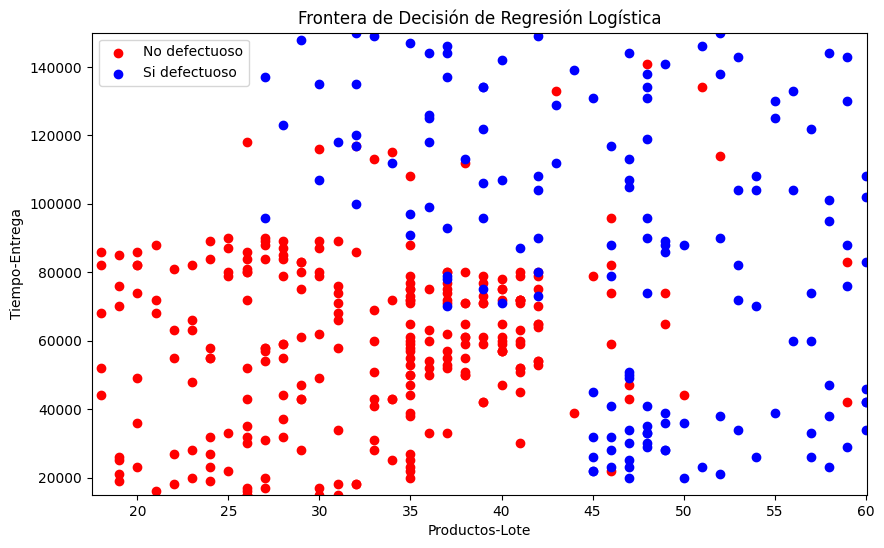

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the data
datos = pd.read_excel("/content/drive/MyDrive/estadística /corte 3 /datos_logisticos.xlsx")
datos.head()

# Define feature and target variables
X1 = 'Productos-Lote'
X2 = 'Tiempo-Entrega'
Y = 'Defectuoso'

# Prepare the data for the model
X = datos[[X1, X2]]
y = datos[Y]

# Train the model with all data
model = LogisticRegression(solver='liblinear')
model.fit(X, y)

# Create a mesh to evaluate the model
x_min, x_max = X[X1].min() - 0.5, X[X1].max() + 0.5
y_min, y_max = X[X2].min() - 0.5, X[X2].max() + 0.5
h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on all points of the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the scatter plot of the data
plt.figure(figsize=(10, 6))
# It appears the labels for the scatter plot are flipped in the original code based on the variable names.
# y == 0 should correspond to 'No defectuoso' and y == 1 to 'Si defectuoso' if 0 is non-defective and 1 is defective.
# Adjusting the labels to be consistent with the assumed meaning of the target variable.
plt.scatter(X[y == 0][X1], X[y == 0][X2], color='red', label='No defectuoso') # Assuming 0 means No defectuoso
plt.scatter(X[y == 1][X1], X[y == 1][X2], color='blue', label='Si defectuoso') # Assuming 1 means Si defectuoso

# Draw the decision boundary
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

# Labels and legend
plt.xlabel(X1)
plt.ylabel(X2)
plt.legend()
plt.title('Frontera de Decisión de Regresión Logística')
plt.show()

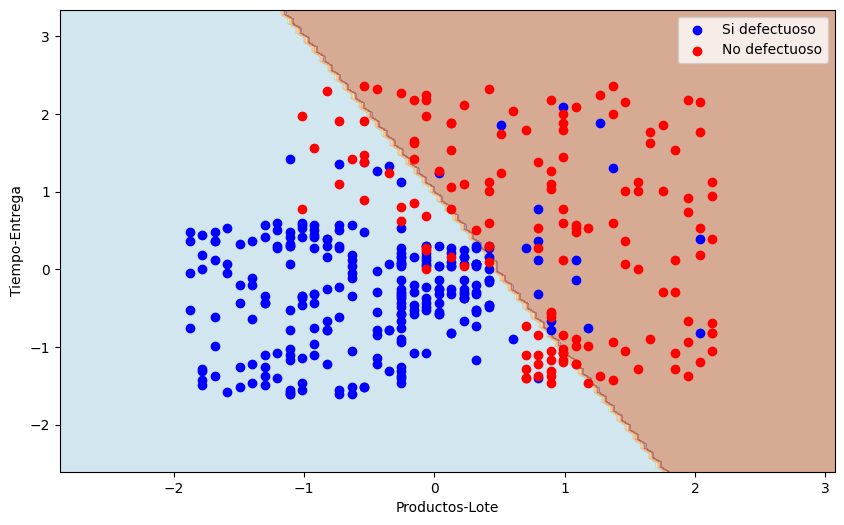

In [16]:
scaler = StandardScaler()
# Ajusta el escalador a los datos y transforma tanto el entrenamiento como los datos de prueba
X_scaled = scaler.fit_transform(X)
# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
# Crea una instancia de LogisticRegression y ajústala a tus datos de entrenamiento
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# Ahora puedes predecir los valores para tus datos de prueba
y_pred = model.predict(X_test)
# Crea una malla para evaluar el modelo
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predice en todos los puntos de la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Crea el gráfico de dispersión de los datos
plt.figure(figsize=(10, 6))
# Dibuja la frontera de decisión con colores de fondo
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='blue', label='Si defectuoso')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='red', label='No defectuoso')
# Etiquetas y leyenda
plt.xlabel(X1)
plt.ylabel(X2)
plt.legend()
plt.show()

In [20]:
Variable_x1 = 30
Variable_x2 = 800000

new_example = pd.DataFrame([[Variable_x1, Variable_x2]], columns=['Productos-Lote', 'Tiempo-Entrega'])
# Escalar las características para que coincidan con la escala de los datos de entrenamiento
new_example_scaled = scaler.transform(new_example)
# Usar el modelo para hacer una predicción
prediction = model.predict(new_example_scaled)
# Define una frase de resultado personalizada basada en la predicción
result_phrase = "NO DEFECTUOSO" if prediction[0] == 1 else " DEFECTUOSO"
print("Un producto que este dentro de un lote de", Variable_x1, "unidades y dure",Variable_x2 ,"minutos en su entrega, es problable que estará en estado:", result_phrase)


Un producto que este dentro de un lote de 30 unidades y dure 800000 minutos en su entrega, es problable que estará en estado: NO DEFECTUOSO
